In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
#email classification
#email type -> 0 = personal ,1 = Work email

In [5]:
df = pd.read_csv("9-email_classification_svm.csv")

In [6]:
df.head()

,subject_formality_score,sender_relationship_score,email_type
0,-1.496790,0.779258,0
1,-1.217610,0.889601,0
2,-0.375945,-0.823324,1
3,0.639609,-0.362827,1
4,-1.342836,-1.040502,1


In [7]:
df.isna().sum()

subject_formality_score      0
sender_relationship_score    0
email_type                   0
dtype: int64

In [8]:
df.describe()

,subject_formality_score,sender_relationship_score,email_type
count,1000.000000,1000.000000,1000.000000
mean,-1.009046,-0.006300,0.498000
std,0.654219,1.059501,0.500246
min,-3.532770,-2.218219,0.000000
25%,-1.252867,-1.006076,0.000000
50%,-0.994760,0.439233,0.000000
75%,-0.754839,0.994943,1.000000
max,2.180933,1.699497,1.000000


In [9]:
df.shape

(1000, 3)

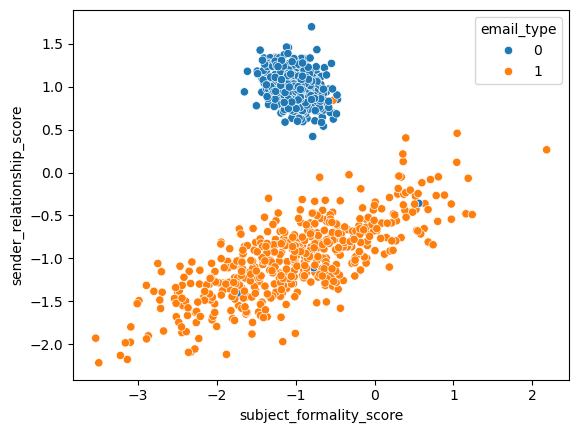

In [10]:
sns.scatterplot(x=df["subject_formality_score"],y=df["sender_relationship_score"],hue=df["email_type"])
plt.show()

In [11]:
df["email_type"].value_counts()

email_type
0    502
1    498
Name: count, dtype: int64

In [12]:
X = df.drop("email_type",axis=1)
y = df["email_type"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=15)

In [14]:
from sklearn.svm import SVC

In [15]:
svc = SVC(kernel="linear")
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [16]:
y_pred = svc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       117
           1       1.00      0.99      1.00       133

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[117   0]
 [  1 132]]


In [19]:
rbf = SVC(kernel="rbf")
rbf.fit(X_train,y_train)
y_pred = rbf.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       117
           1       1.00      0.99      1.00       133

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[117   0]
 [  1 132]]


In [20]:
df = pd.read_csv("9-loan_risk_svm.csv")

In [21]:
df.head()

,credit_score_fluctuation,recent_transaction_volume,loan_risk
0,-1.439860,1.283010,1
1,-0.276571,-1.232382,0
2,1.312047,0.955097,1
3,1.020706,0.089485,0
4,1.513729,0.580520,1


In [22]:
df.shape

(1000, 3)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   credit_score_fluctuation   1000 non-null   float64
 1   recent_transaction_volume  1000 non-null   float64
 2   loan_risk                  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [24]:
df.isna().sum()

credit_score_fluctuation     0
recent_transaction_volume    0
loan_risk                    0
dtype: int64

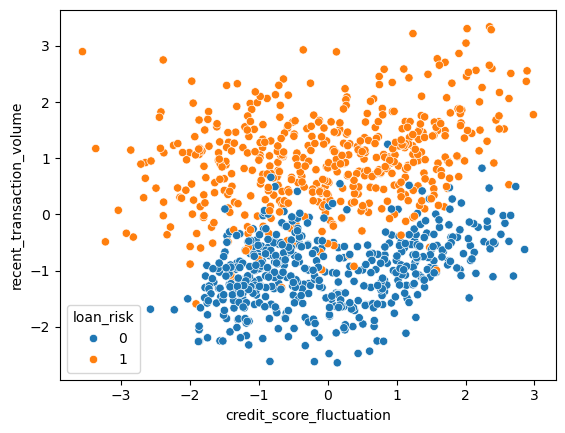

In [25]:
sns.scatterplot(x=df["credit_score_fluctuation"],y=df["recent_transaction_volume"],hue=df["loan_risk"])
plt.show()

In [26]:
X= df.drop("loan_risk",axis=1)
y= df["loan_risk"]

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [28]:
linear = SVC(kernel="linear")
linear.fit(X_train,y_train)
y_pred= linear.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       118
           1       0.93      0.91      0.92       132

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[109   9]
 [ 12 120]]


In [29]:
rbf = SVC(kernel="rbf")
rbf.fit(X_train,y_train)
y_pred= rbf.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       124
           1       0.91      0.94      0.93       126

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[113  11]
 [  8 118]]


In [30]:
poly = SVC(kernel="poly")
poly.fit(X_train,y_train)
y_pred= poly.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       115
           1       0.94      0.90      0.92       135

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[107   8]
 [ 14 121]]


In [31]:
sigmoid = SVC(kernel="sigmoid")
sigmoid.fit(X_train,y_train)
y_pred= sigmoid.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       118
           1       0.84      0.83      0.84       132

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

[[ 98  20]
 [ 23 109]]


In [32]:
df = pd.read_csv("9-seismic_activity_svm.csv")

In [65]:
df

,underground_wave_energy,vibration_axis_variation,seismic_event_detected
0,9.539392,-3.000000,0
1,9.558241,-2.939394,0
2,9.576669,-2.878788,0
3,9.594678,-2.818182,0
4,9.612272,-2.757576,0
...,...,...,...
395,-4.170824,-2.757576,1
396,-4.130115,-2.818182,1
397,-4.088102,-2.878788,1
398,-4.044745,-2.939394,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   underground_wave_energy   400 non-null    float64
 1   vibration_axis_variation  400 non-null    float64
 2   seismic_event_detected    400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [71]:
df["seismic_event_detected"].value_counts()

seismic_event_detected
0    200
1    200
Name: count, dtype: int64

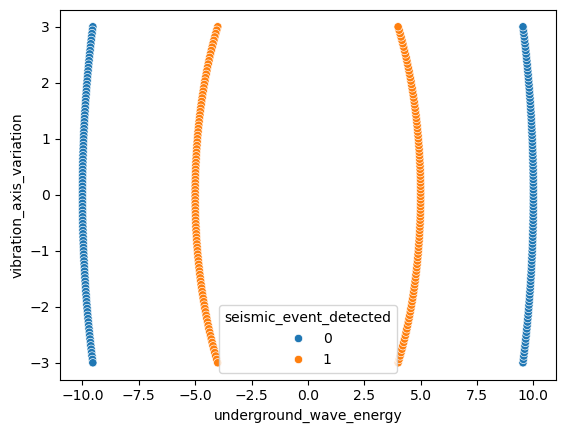

In [73]:
sns.scatterplot(x=df["underground_wave_energy"],y=df["vibration_axis_variation"],hue=df["seismic_event_detected"])
plt.show()

In [75]:
#manual rbf kernel

In [77]:
df['underground_wave_energy **2']= df['underground_wave_energy']**2
df['vibration_axis_variation **2']= df['vibration_axis_variation']**2
df['underground_wave_energy*vibration_axis_variation'] = (df['underground_wave_energy'] *df['vibration_axis_variation'])
df.head()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected,underground_wave_energy **2,vibration_axis_variation **2,underground_wave_energy*vibration_axis_variation
0,9.539392,-3.000000,0,91.000000,9.000000,-28.618176
1,9.558241,-2.939394,0,91.359963,8.640037,-28.095434
2,9.576669,-2.878788,0,91.712580,8.287420,-27.569197
3,9.594678,-2.818182,0,92.057851,7.942149,-27.039548
4,9.612272,-2.757576,0,92.395776,7.604224,-26.506569


In [81]:
X=df.drop('seismic_event_detected',axis=1)
y=df['seismic_event_detected']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [90]:
linear=SVC(kernel='linear')
linear.fit(X_train,y_train)
y_pred8=linear.predict(X_test)
print(classification_report(y_test,y_pred8))
print(confusion_matrix(y_test,y_pred8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[48  0]
 [ 0 52]]


In [92]:
#let's do automatic rbf

In [94]:
df = pd.read_csv("9-seismic_activity_svm.csv")

In [96]:
X=df.drop('seismic_event_detected',axis=1)
y=df['seismic_event_detected']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [100]:
linear=SVC(kernel='linear')
linear.fit(X_train,y_train)
y_pred9=linear.predict(X_test)
print(classification_report(y_test,y_pred9))
print(confusion_matrix(y_test,y_pred9))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        48
           1       0.00      0.00      0.00        52

    accuracy                           0.48       100
   macro avg       0.24      0.50      0.32       100
weighted avg       0.23      0.48      0.31       100

[[48  0]
 [52  0]]


C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [102]:
#linear does not give a good score as expected

In [104]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred11=rbf.predict(X_test)
print(classification_report(y_test,y_pred11))
print(confusion_matrix(y_test,y_pred11))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[48  0]
 [ 0 52]]


In [106]:

#rbf gives the same score automatically